# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price

import json

response_data_btc = requests.get(btc_url)

response_content_btc = response_data_btc.content

data_btc = response_data_btc.json()

print(json.dumps(data_btc, indent=4))



# Fetch current ETH price

response_data_eth = requests.get(eth_url)

response_content_eth = response_data_eth.content

data_eth = response_data_eth.json()

print(json.dumps(data_eth, indent=4))




# Compute current value of my crpto

btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_value

eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18924881,
            "total_supply": 18924881,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 42107.0,
                    "volume_24h": 17555927033,
                    "market_cap": 795599752549,
                    "percentage_change_1h": 0.0435685720289918,
                    "percentage_change_24h": 0.363514005957117,
                    "percentage_change_7d": -11.1430594449193,
                    "percent_change_1h": 0.0435685720289918,
                    "percent_change_24h": 0.363514005957117,
                    "percent_change_7d": -11.1430594449193
                },
                "CAD": {
                    "price": 53269.5657,
                    "volume_24h": 22210003289.4483,
                 

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [36]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [37]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [8]:
# Format current date as ISO format
# YOUR CODE HERE!

today = pd.Timestamp("2021-12-10", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_ticker = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# remove time from the date index
df_ticker.index = df_ticker.index.date

# Preview DataFrame

df_ticker.head()

AGG                                      SPY                 \
              open    high     low   close   volume    open   high     low   
2021-12-10  114.37  114.51  114.22  114.24  6263328  469.23  470.9  466.51   

                              
             close    volume  
2021-12-10  470.72  64958435

In [38]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])

   
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.24
Current SPY closing price: $470.72


In [10]:
# Compute the current value of shares

my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23536.00
The current value of your 200 AGG shares is $22848.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

crypto_total_value = my_btc_value + my_eth_value
shares_total_value = my_spy_value + my_agg_value

dataframe = {
    "amount":[crypto_total_value, shares_total_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(dataframe, index =["crypto", "shares"])
    
    
 # Display savings DataFrame
display(df_savings)

,amount
crypto,67335.654
shares,46384.000


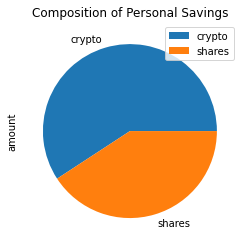

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings");

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = shares_total_value + crypto_total_value

# Validate saving health

if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reached your financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching your emergency fund goal")


Congratuations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Drop the time component of the date
df_stock_data.index = df_stock_data.index.date


# Display sample data
df_stock_data

AGG                                             SPY          \
              open      high       low    close     volume    open    high   
2017-05-10  108.60  108.6600  108.4400  108.520  1427511.0     NaN     NaN   
2017-05-11  108.35  108.5400  108.3435  108.515  1773499.0  239.35  239.57   
2017-05-12  108.81  108.9400  108.7800  108.920  1136553.0  239.09  239.21   
2017-05-15  108.85  108.9400  108.8200  108.890  1620264.0  239.47  240.44   
2017-05-16  108.88  109.1010  108.8800  109.000  1394153.0  240.62  240.67   
...            ...       ...       ...      ...        ...     ...     ...   
2021-04-26  114.74  114.8015  114.6500  114.650  2867784.0  417.44  418.22   
2021-04-27  115.13  115.1300  114.3700  114.370  3421667.0  417.91  418.14   
2021-04-28  114.45  114.4685  114.2000  114.440  6185936.0  417.81  419.01   
2021-04-29  114.14  114.3700  114.0900  114.370  5796983.0  420.33  420.72   
2021-04-30  114.41  114.5150  114.3300  114.500  5160765.0  417.63  418.54   

                                           
                 low    close      volume  
2017-05-10       NaN      NaN         NaN  
2017-05-11  238.1300  239.410  45435690.0  
2017-05-12  238.6700  239.030  35283567.0  
2017-05-15  239.4500  240.245  42230620.0  
2017-05-16  239.6300  240.100  37206183.0  
...              ...      ...         ...  
2021-04-26  416.8111  417.640  44689009.0  
2021-04-27  416.3000  417.480  45962264.0  
2021-04-28  416.9000  417.350  45533863.0  
2021-04-29  416.4400  419.990  70607144.0  
2021-04-30  416.3400  417.300  73129109.0  

[1001 rows x 10 columns]

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

?MCSimulation

MC_traditional_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)


Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [17]:
# Printing the simulation input data
MC_traditional_dist.portfolio_data.head()

AGG                                                      \
              open     high       low    close     volume daily_return   
2017-05-10  108.60  108.660  108.4400  108.520  1427511.0          NaN   
2017-05-11  108.35  108.540  108.3435  108.515  1773499.0    -0.000046   
2017-05-12  108.81  108.940  108.7800  108.920  1136553.0     0.003732   
2017-05-15  108.85  108.940  108.8200  108.890  1620264.0    -0.000275   
2017-05-16  108.88  109.101  108.8800  109.000  1394153.0     0.001010   

               SPY                                                    
              open    high     low    close      volume daily_return  
2017-05-10     NaN     NaN     NaN      NaN         NaN          NaN  
2017-05-11  239.35  239.57  238.13  239.410  45435690.0          NaN  
2017-05-12  239.09  239.21  238.67  239.030  35283567.0    -0.001587  
2017-05-15  239.47  240.44  239.45  240.245  42230620.0     0.005083  
2017-05-16  240.62  240.67  239.63  240.100  37206183.0    -0.000604

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_traditional_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/christianseeley/Documents/Coding/Group_Project_1/project-1/src/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004642,0.987370,0.999719,0.995015,1.004503,0.997878,1.006830,1.001476,1.011318,1.003908,...,1.007966,1.008052,1.006913,1.002464,1.003636,1.005760,0.994674,0.991349,0.994684,0.995987
2,1.015939,0.993804,1.006295,1.000527,0.994182,1.005821,0.997434,1.003894,1.010537,1.004697,...,1.011594,1.001684,1.009035,1.007792,1.007017,1.021769,0.994602,0.999588,0.996627,0.985488
3,1.017156,0.982236,1.000372,1.005278,1.000984,1.004240,1.001645,1.011392,0.999452,1.009164,...,1.023073,1.007027,1.013852,1.010154,1.018300,1.019108,1.000356,0.999106,0.998392,0.976498
4,1.019517,0.983194,1.009670,0.996517,1.015544,1.008238,1.000936,1.013307,1.003221,1.010478,...,1.015621,1.014759,1.022154,1.021222,1.018435,1.014054,1.003527,0.997554,1.001785,0.977726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,27.189479,8.841553,9.164508,27.762012,24.242547,16.162063,23.416605,32.741837,23.401512,17.226926,...,31.669304,30.036621,8.182133,10.823196,15.019399,23.267881,20.976048,14.063397,50.023153,18.250201
7557,27.170093,8.918310,9.020326,27.845538,23.975794,16.086548,23.286030,32.566518,23.190014,17.312348,...,31.702905,29.644837,8.170183,10.872325,15.092175,23.372039,20.948192,14.055275,50.601218,18.346675
7558,27.239437,8.932908,8.969884,27.761536,24.253919,16.105656,23.403051,32.889409,23.408606,17.300633,...,31.507750,29.815620,8.271225,10.868007,15.039809,23.359155,20.736606,14.120313,51.152386,18.513217
7559,26.643170,8.772603,9.010716,27.852942,24.142981,16.053599,23.166946,32.996803,23.463952,17.305267,...,31.544067,29.486729,8.207005,10.903157,15.040208,22.840632,21.103659,13.875157,51.264193,18.395071


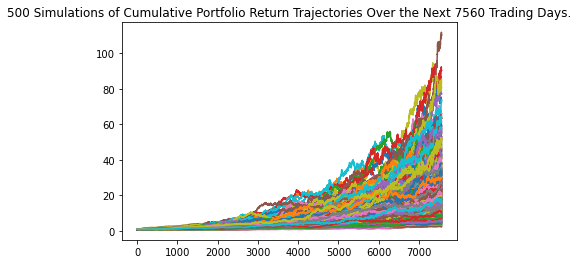

In [42]:
# Plot simulation outcomes

line_plot = MC_traditional_dist.plot_simulation()

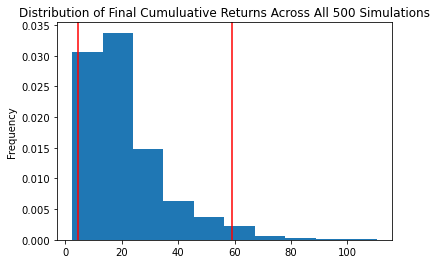

In [40]:
# Plot probability distribution and confidence intervals
dist_plot = MC_traditional_dist.plot_distribution()

### Retirement Analysis

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
traditional_tbl = MC_traditional_dist.summarize_cumulative_return()

# Print summary statistics
print(traditional_tbl)

count           500.000000
mean             21.453751
std              15.003042
min               2.445452
25%              11.363025
50%              17.295627
75%              27.193612
max             110.305666
95% CI Lower      4.667991
95% CI Upper     59.233774
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
## rounded to 2 decimal places

ci_lower = round(traditional_tbl[8]*20000,2)
ci_upper = round(traditional_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $93359.83 and $1184675.48


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round(traditional_tbl[8]*initial_investment,2)
ci_upper = round(traditional_tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $140039.74 and $1777013.22


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_traditional_dist_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)


In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_traditional_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/christianseeley/Documents/Coding/Group_Project_1/project-1/src/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989167,0.988239,1.000262,1.009652,0.992037,1.004593,0.982437,0.995720,0.999041,0.994355,...,1.006125,1.001958,0.997301,1.004957,0.988424,0.996072,1.006419,0.990665,1.003537,0.997545
2,1.003703,0.991471,1.001162,1.005281,0.989362,1.007641,0.986680,0.987066,1.007474,0.991395,...,1.004881,1.007561,0.991874,0.997014,0.981978,0.996828,1.008455,0.987807,1.002462,1.001257
3,0.998408,0.983974,1.001072,1.021674,0.996561,1.006840,0.995270,0.985719,1.007727,0.998134,...,1.009007,0.994911,1.001106,0.998472,0.969309,0.972071,1.007348,0.997564,1.000413,1.014162
4,1.006462,0.993011,0.991625,1.032126,0.998050,1.011205,1.004114,0.979212,1.008195,0.998732,...,1.018143,1.001267,0.997617,0.997884,0.966198,0.980032,1.008952,0.995718,0.996913,1.019208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.107396,1.188293,1.243325,2.165033,1.023875,0.976924,1.951092,1.447351,1.581172,1.944026,...,2.396513,0.942707,2.544732,0.717299,1.685348,1.443574,1.311536,1.258953,2.575075,1.004777
1257,2.096205,1.192920,1.231376,2.178948,1.026214,0.985597,1.976466,1.474365,1.584801,1.932725,...,2.373949,0.938854,2.567319,0.709737,1.693861,1.436244,1.345479,1.253160,2.567177,1.000910
1258,2.075105,1.185602,1.229298,2.171217,1.003728,0.997619,1.962340,1.470107,1.572701,1.918618,...,2.380303,0.936579,2.545931,0.722352,1.719212,1.432564,1.351803,1.252610,2.561310,1.015510
1259,2.091069,1.182548,1.214492,2.177770,1.016302,1.007016,1.980615,1.480888,1.564100,1.903347,...,2.358628,0.937242,2.559534,0.725830,1.719466,1.423277,1.357999,1.250763,2.583076,1.015066


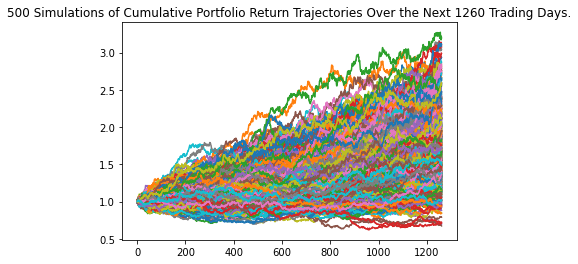

In [26]:
# Plot simulation outcomes
line_plot_five = MC_traditional_dist_five.plot_simulation()

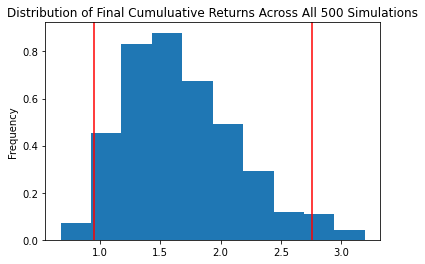

In [27]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_traditional_dist_five.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
traditional_tbl_five = MC_traditional_dist_five.summarize_cumulative_return()


# Print summary statistics
print(traditional_tbl_five)

count           500.000000
mean              1.678301
std               0.470193
min               0.673373
25%               1.330588
50%               1.609983
75%               1.954771
max               3.197057
95% CI Lower      0.954331
95% CI Upper      2.755182
Name: 1260, dtype: float64


In [29]:
# Set initial investment

#increase to $50,000

initial_investment_five = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(traditional_tbl_five[8]*initial_investment_five,2)
ci_upper_five = round(traditional_tbl_five[9]*initial_investment_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $47716.55 and $137759.1


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_traditional_dist_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)


In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_traditional_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/christianseeley/Documents/Coding/Group_Project_1/project-1/src/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999887,0.993736,1.008817,0.995509,1.003997,0.988547,1.011757,1.011834,1.018141,1.005889,...,1.004091,0.988135,1.000246,0.996789,0.995006,1.005508,1.002057,1.004970,1.014916,0.998806
2,0.994416,0.996314,1.006897,0.991086,0.994142,0.981918,0.998476,1.018865,1.017052,0.999143,...,1.002119,0.993390,0.996437,0.993403,0.997733,1.010549,1.002001,1.025084,1.023161,0.995019
3,0.990912,0.984617,1.009836,0.993638,1.004336,0.983540,0.987133,1.036606,1.009886,0.994190,...,1.013803,0.989348,1.008515,0.990404,1.006124,1.004572,0.998021,1.003461,1.030599,0.998321
4,1.000171,0.989768,1.004639,0.995045,1.008066,0.986005,0.986519,1.041915,1.014942,0.997384,...,1.007304,0.989183,1.002158,0.996676,1.006876,0.997186,1.006862,0.994594,1.043330,0.978189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.486395,4.177740,1.144506,1.351377,3.975361,1.920720,1.273606,2.722560,2.687123,3.830262,...,2.746818,2.897869,1.734531,0.983116,2.790658,1.661897,3.957587,1.595006,2.397248,1.871817
2517,5.569335,4.235570,1.152400,1.359593,4.003710,1.910448,1.280970,2.705696,2.703114,3.880596,...,2.771390,2.891753,1.748649,0.977167,2.788370,1.629784,3.984261,1.581102,2.399211,1.866630
2518,5.562347,4.225664,1.147870,1.364355,4.038154,1.905259,1.303899,2.697363,2.743585,3.882257,...,2.756941,2.862675,1.749046,0.982683,2.801533,1.615527,4.012493,1.584625,2.397619,1.860479
2519,5.588154,4.224667,1.148923,1.356931,4.052013,1.888385,1.312551,2.702347,2.757815,3.910993,...,2.719720,2.787021,1.745598,0.988753,2.840415,1.605036,4.034818,1.597273,2.404471,1.844649


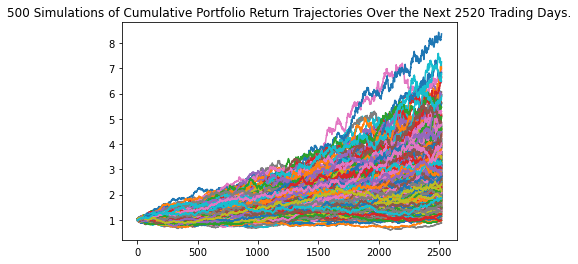

In [32]:
# Plot simulation outcomes
line_plot_ten = MC_traditional_dist_ten.plot_simulation()

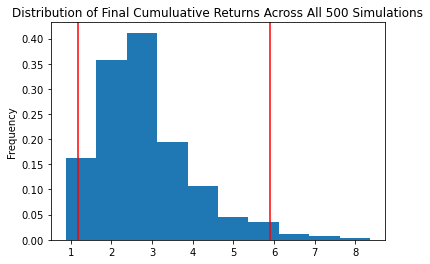

In [33]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_traditional_dist_ten.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
traditional_tbl_ten = MC_traditional_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(traditional_tbl_ten)

count           500.000000
mean              2.808261
std               1.172467
min               0.879168
25%               1.978409
50%               2.599186
75%               3.355379
max               8.361456
95% CI Lower      1.182139
95% CI Upper      5.905210
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment_ten = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(traditional_tbl_ten[8]*initial_investment_ten,2)
ci_upper_ten = round(traditional_tbl_ten[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within in the range of $59106.95 and $295260.52
